<a href="https://colab.research.google.com/github/stephen000000/CodeCademy_SQL/blob/master/DeepLearning_Assignment2Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Stephen Loftus ID: 16416784

##Setup

In [58]:
##google drive set up 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##moving into required directory 
%ls
%cd drive/
%cd MyDrive/
%cd 'DeepLearning - Assignment 2'/

Covid/  DeepLearning_Assignment2Code.ipynb
[Errno 2] No such file or directory: 'drive/'
/content/drive/MyDrive/DeepLearning - Assignment 2
[Errno 2] No such file or directory: 'MyDrive/'
/content/drive/MyDrive/DeepLearning - Assignment 2
[Errno 2] No such file or directory: 'DeepLearning - Assignment 2/'
/content/drive/MyDrive/DeepLearning - Assignment 2


In [ ]:
##importing required packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##Part 2

In [ ]:
#seting image size and batch size 
batch_size = 32
img_height = 224
img_width = 224

#loading in training dataset of downloaded images 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'Covid/train/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#loading in validation dataset of downloaded images 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'Covid/train/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#loading in test data 
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Covid/test/',
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

#printing class names
class_names = train_ds.class_names
print(len(class_names))
print(class_names)

Found 182 files belonging to 2 classes.
Using 146 files for training.
Found 182 files belonging to 2 classes.
Using 36 files for validation.
Found 46 files belonging to 2 classes.
2
['Covid', 'Normal']


In [ ]:

base_model = keras.applications.VGG16(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    include_top=False,
) 

# adding additional layers
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Softmax()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
predictions = keras.layers.Dense(1, activation='softmax')(x)

##getting model sumamry
model = keras.Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0     

In [ ]:
#Freezing base layers 
for layer in base_model.layers:
  layer.trainable = False

#Setting model training parameters
model.compile(
    optimizer=keras.optimizers.Adam(1e-5), 
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

#Training the base model
epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Epoch 1/20
5/5 [==============================] - 178s 10s/step - loss: 0.6930 - binary_accuracy: 0.4206 - val_loss: 0.6920 - val_binary_accuracy: 0.3611
Epoch 2/20
5/5 [==============================] - 11s 2s/step - loss: 0.6923 - binary_accuracy: 0.3677 - val_loss: 0.6917 - val_binary_accuracy: 0.3611
Epoch 3/20
5/5 [==============================] - 11s 2s/step - loss: 0.6925 - binary_accuracy: 0.4154 - val_loss: 0.6915 - val_binary_accuracy: 0.3611
Epoch 4/20
5/5 [==============================] - 11s 2s/step - loss: 0.6921 - binary_accuracy: 0.4020 - val_loss: 0.6912 - val_binary_accuracy: 0.3611
Epoch 5/20
5/5 [==============================] - 11s 2s/step - loss: 0.6923 - binary_accuracy: 0.4228 - val_loss: 0.6910 - val_binary_accuracy: 0.3611
Epoch 6/20
5/5 [==============================] - 11s 2s/step - loss: 0.6924 - binary_accuracy: 0.4349 - val_loss: 0.6908 - val_binary_accuracy: 0.3611
Epoch 7/20
5/5 [==============================] - 11s 2s/step - loss: 0.6913 - binary_

In [ ]:
#Testing model performance on unseen data
score = model.evaluate(test_ds, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6807284355163574
Test accuracy: 0.5652173757553101


##Part 3

Code in this section is based off a tutorial found at : 

Medium. 2021. Visualizing intermediate activation in Convolutional Neural Networks with Keras. [online] Available at: <https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0> [Accessed 5 May 2021].

In [62]:
##getting list of layers 
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

print(layer_names)
print(len(layer_names))

['input_2', 'conv1', 'conv1_bn', 'conv1_relu', 'conv_dw_1', 'conv_dw_1_bn', 'conv_dw_1_relu', 'conv_pw_1', 'conv_pw_1_bn', 'conv_pw_1_relu', 'conv_pad_2', 'conv_dw_2', 'conv_dw_2_bn', 'conv_dw_2_relu', 'conv_pw_2', 'conv_pw_2_bn', 'conv_pw_2_relu', 'conv_dw_3', 'conv_dw_3_bn', 'conv_dw_3_relu', 'conv_pw_3', 'conv_pw_3_bn', 'conv_pw_3_relu', 'conv_pad_4', 'conv_dw_4', 'conv_dw_4_bn', 'conv_dw_4_relu', 'conv_pw_4', 'conv_pw_4_bn', 'conv_pw_4_relu', 'conv_dw_5', 'conv_dw_5_bn', 'conv_dw_5_relu', 'conv_pw_5', 'conv_pw_5_bn', 'conv_pw_5_relu', 'conv_pad_6', 'conv_dw_6', 'conv_dw_6_bn', 'conv_dw_6_relu', 'conv_pw_6', 'conv_pw_6_bn', 'conv_pw_6_relu', 'conv_dw_7', 'conv_dw_7_bn', 'conv_dw_7_relu', 'conv_pw_7', 'conv_pw_7_bn', 'conv_pw_7_relu', 'conv_dw_8', 'conv_dw_8_bn', 'conv_dw_8_relu', 'conv_pw_8', 'conv_pw_8_bn', 'conv_pw_8_relu', 'conv_dw_9', 'conv_dw_9_bn', 'conv_dw_9_relu', 'conv_pw_9', 'conv_pw_9_bn', 'conv_pw_9_relu', 'conv_dw_10', 'conv_dw_10_bn', 'conv_dw_10_relu', 'conv_pw_10', '

In [89]:
#Finding neurons that correlate to class prediction 
from keras.preprocessing import image

##getting required layers 
layer_outputs = [layer.output for layer in model.layers[:89]]
print(model.layers[87].name)
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs) 

#loading in image 
testImagePath = 'Covid/test/Normal/0120.jpeg'
testImage = image.load_img(testImagePath,target_size=(224,224))
testImage = image.img_to_array(testImage)
testImage = np.expand_dims(testImage,axis=0)

##getting softmax layer to find scalar outputs 
activations = activation_model.predict(testImage) 
first_layer_activation = activations[89]
print(first_layer_activation.shape)
#getting number of neurons in softmax layer
neurons = first_layer_activation.shape[1]

importantNeurons = []
#for each neuron in softmax layer shecking if scalar output is strongly correlated with class label if it is adding it to a list of important neurons 
for val in np.arange(0,neurons):
  scalar_output = first_layer_activation[0, val]
  if  scalar_output > 0.00099 :
    importantNeurons.append(val)

#printing out list of important neurons 
print(len(importantNeurons))
print(importantNeurons)

softmax
(1, 1024)
93
[11, 12, 32, 47, 60, 63, 70, 76, 90, 91, 95, 98, 105, 110, 114, 116, 124, 130, 135, 140, 171, 178, 184, 187, 191, 192, 233, 236, 238, 261, 290, 305, 319, 329, 336, 344, 363, 409, 411, 426, 432, 434, 444, 446, 448, 469, 475, 477, 493, 498, 504, 511, 515, 521, 524, 529, 556, 569, 578, 588, 594, 618, 620, 630, 640, 649, 658, 671, 697, 699, 709, 716, 723, 734, 738, 777, 783, 785, 792, 818, 826, 886, 912, 923, 938, 948, 971, 972, 974, 976, 979, 1012, 1020]


##Part 4

Code in this section is based off a tutorial found at : 

Medium. 2021. Visualizing intermediate activation in Convolutional Neural Networks with Keras. [online] Available at: <https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0> [Accessed 5 May 2021].

(1, 7, 7, 1024)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


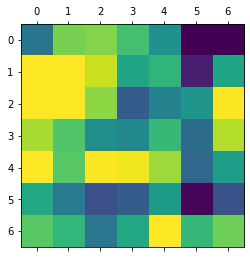

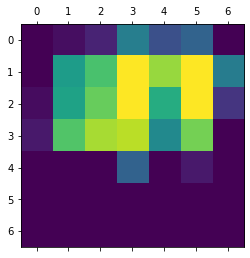

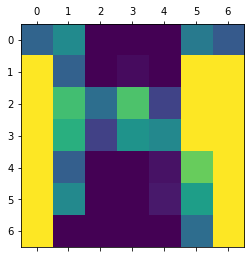

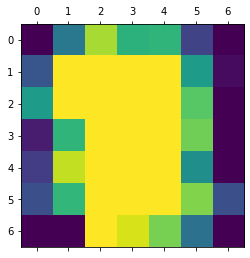

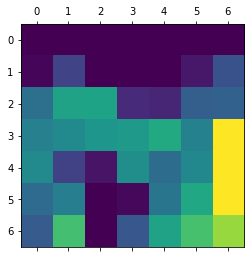

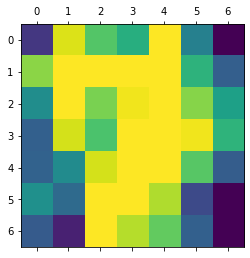

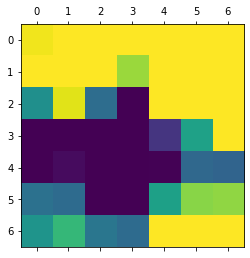

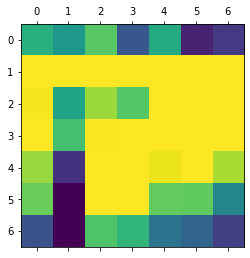

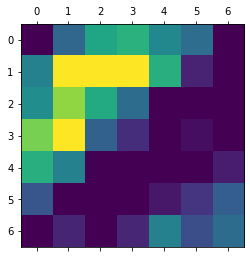

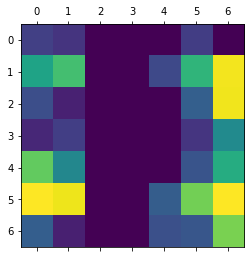

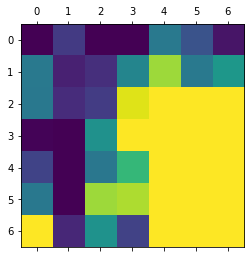

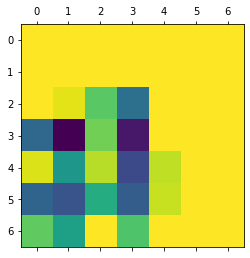

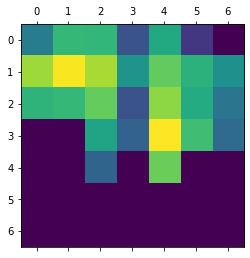

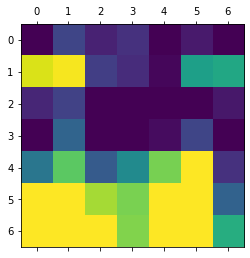

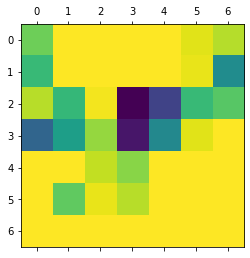

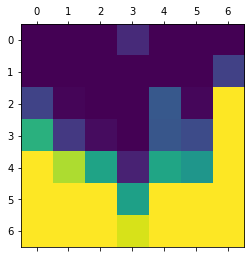

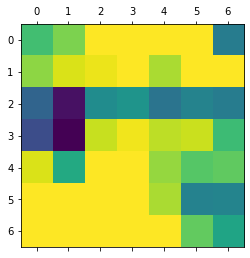

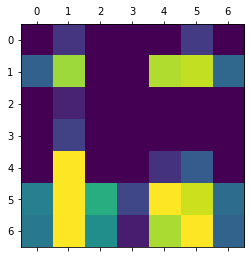

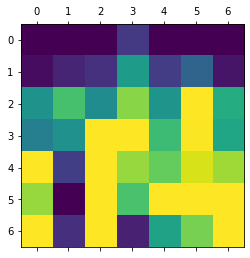

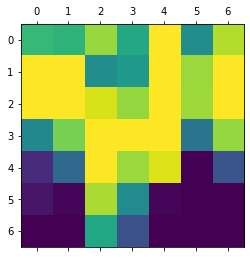

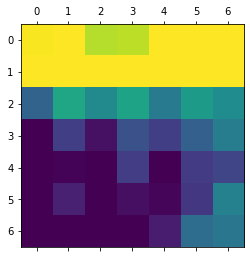

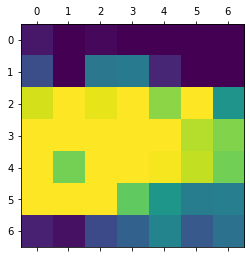

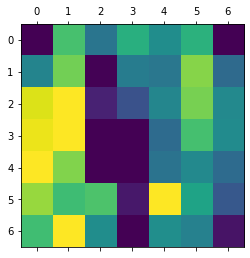

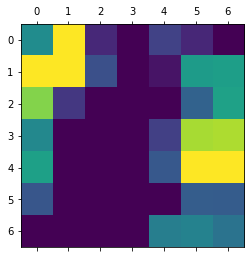

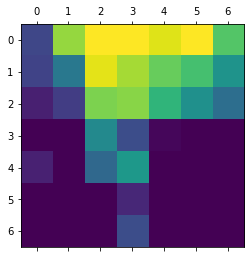

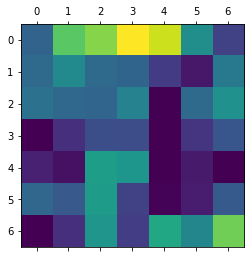

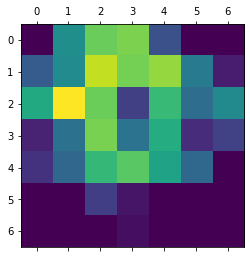

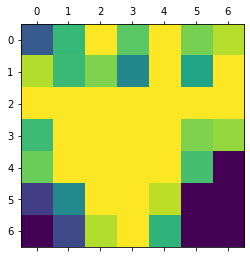

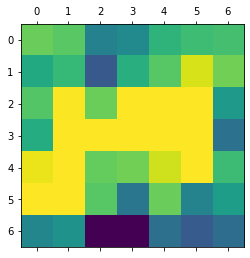

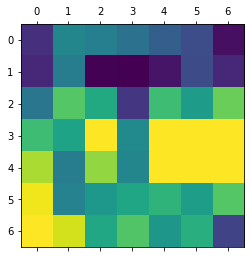

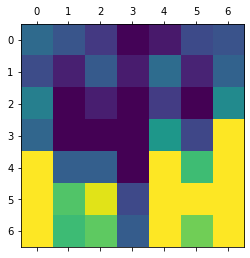

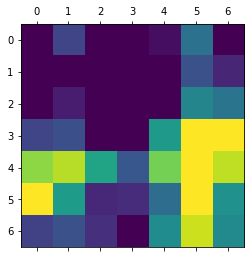

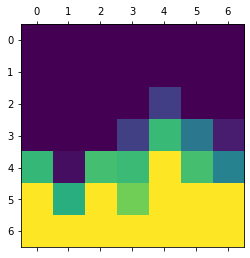

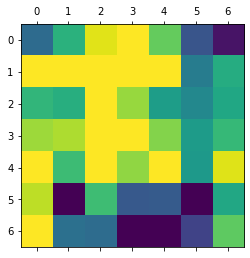

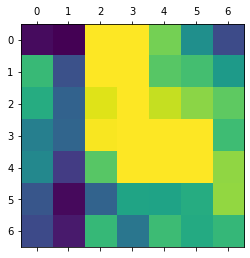

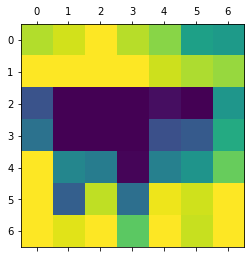

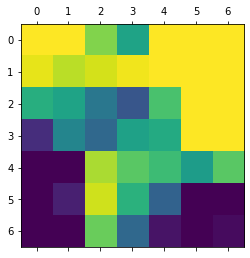

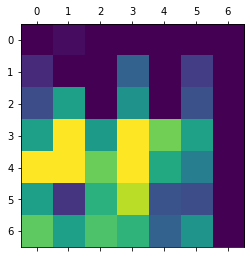

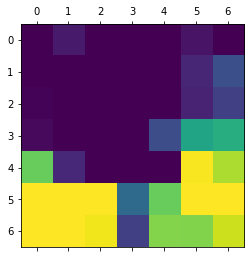

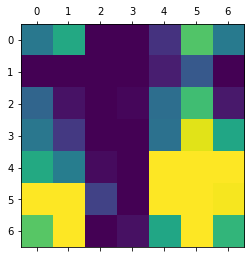

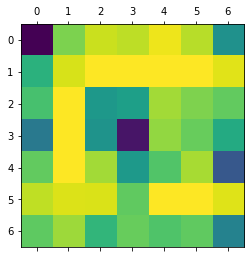

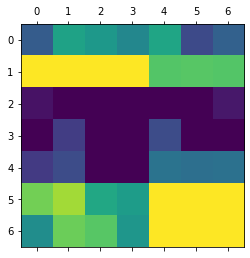

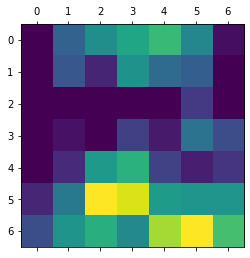

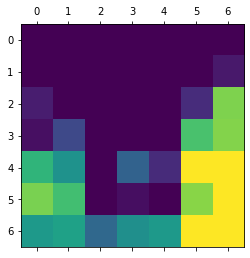

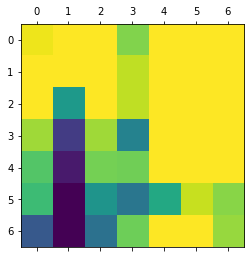

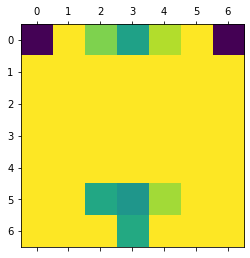

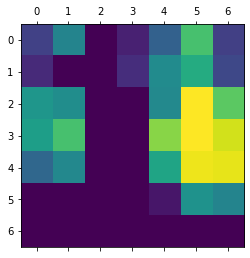

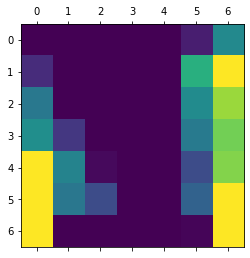

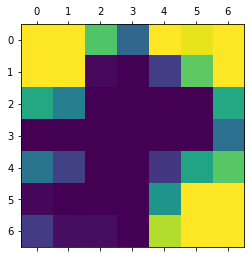

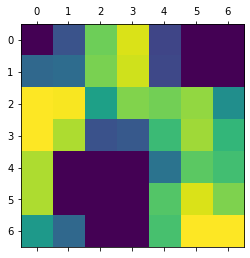

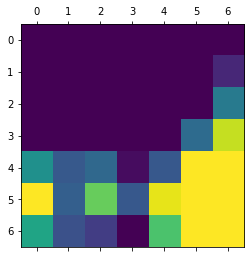

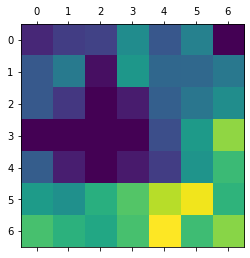

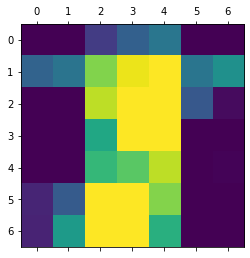

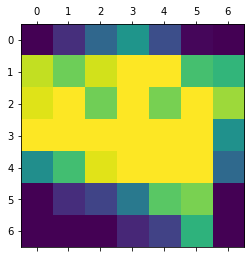

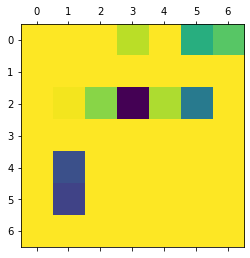

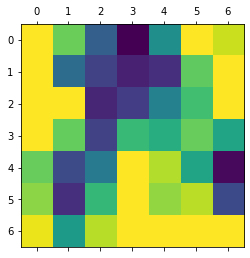

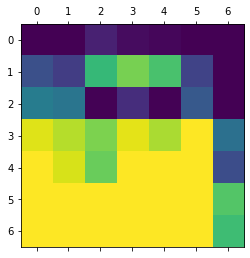

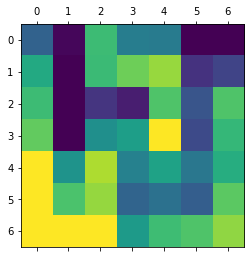

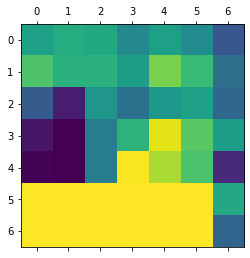

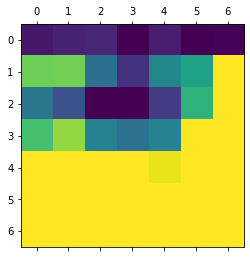

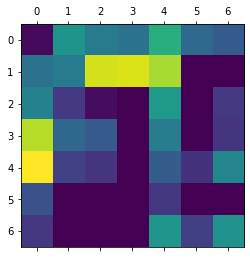

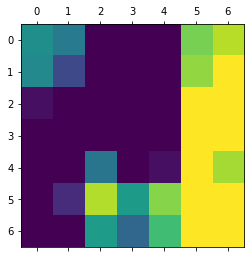

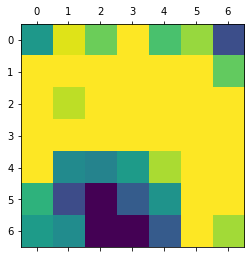

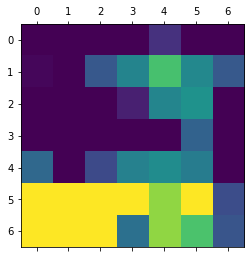

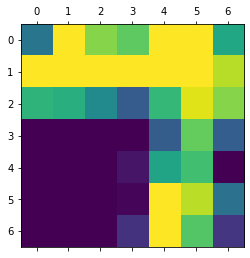

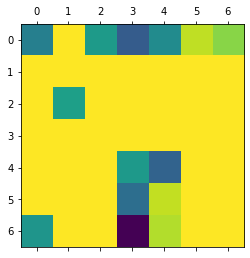

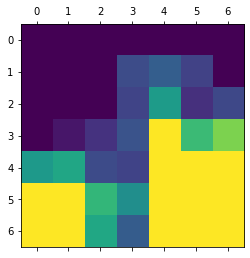

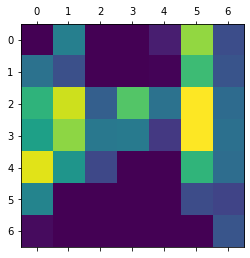

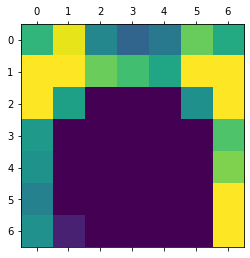

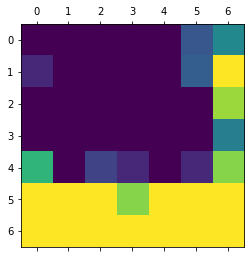

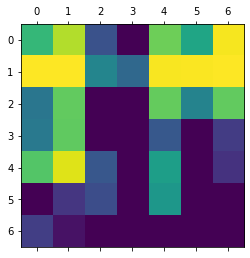

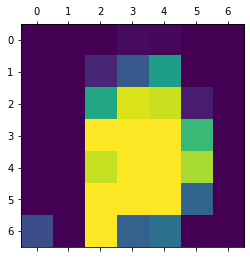

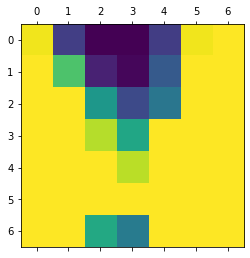

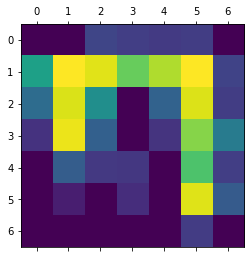

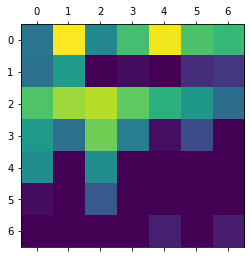

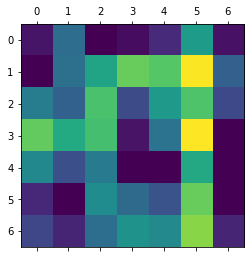

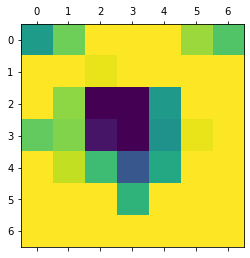

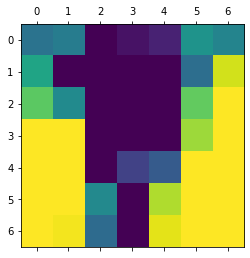

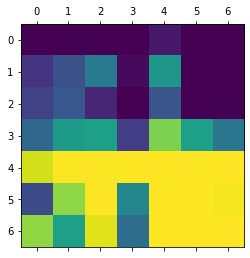

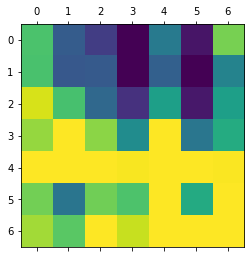

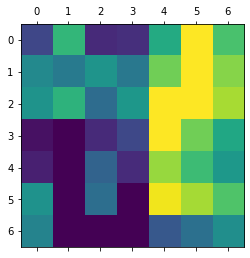

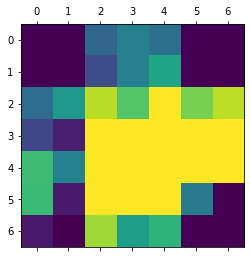

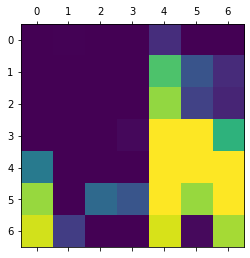

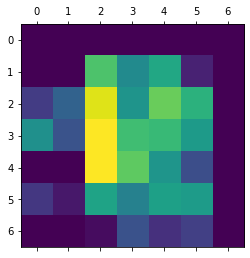

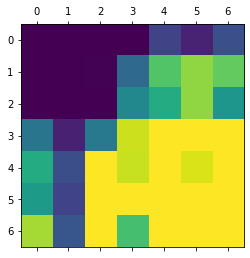

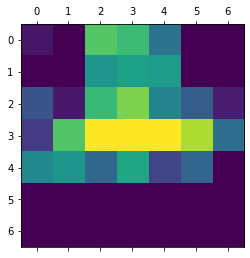

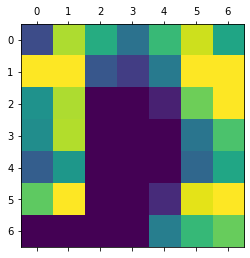

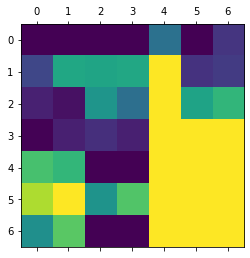

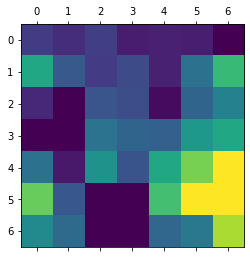

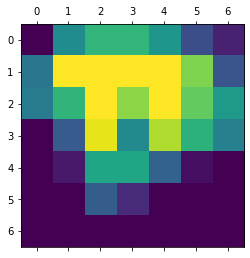

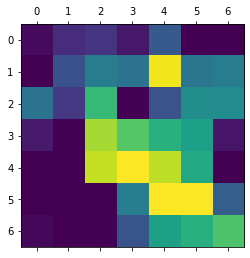

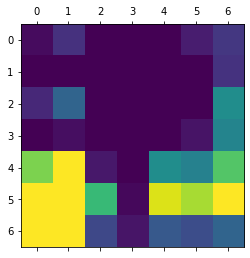

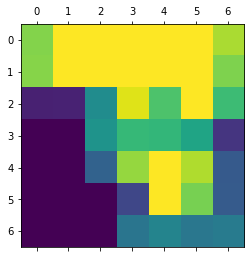

In [102]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

## loading model layers 
layer_outputs = [layer.output for layer in model.layers[:89]]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs) 

##loading image 
testImagePath = 'Covid/test/Normal/0120.jpeg'
testImage = image.load_img(testImagePath,target_size=(224,224))
testImage = image.img_to_array(testImage)
testImage = np.expand_dims(testImage,axis=0)

activations = activation_model.predict(testImage) 
first_layer_activation = activations[85]
print(first_layer_activation.shape)
#print(first_layer_activation[0, 6])
for iNeuron in importantNeurons:
  plt.matshow(first_layer_activation[0,:, :, iNeuron], cmap='viridis')

## Extra Neuron plotting

Code in this section is based off a tutorial found at : 

Medium. 2021. Visualizing intermediate activation in Convolutional Neural Networks with Keras. [online] Available at: <https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0> [Accessed 5 May 2021].

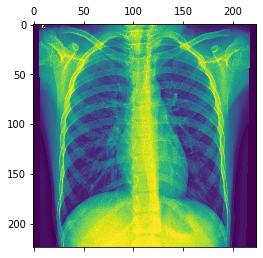

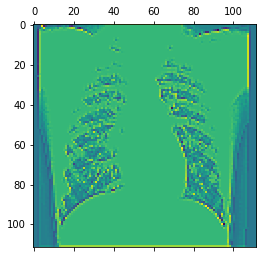

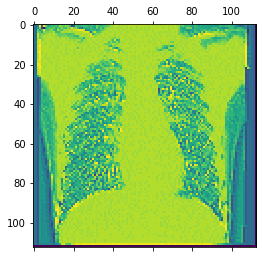

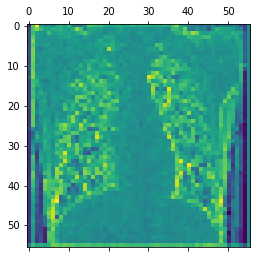

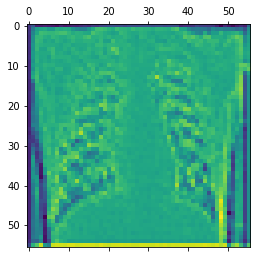

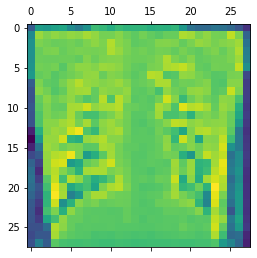

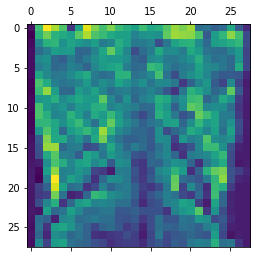

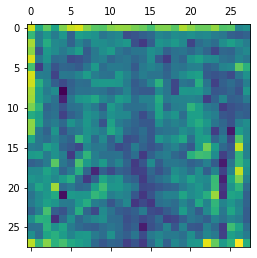

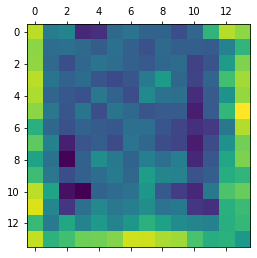

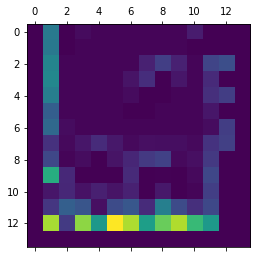

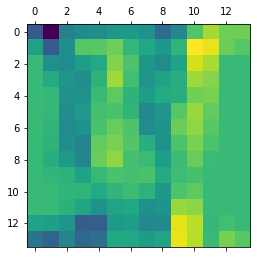

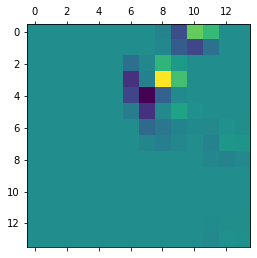

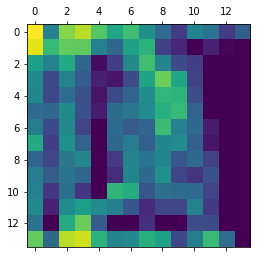

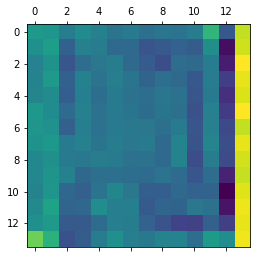

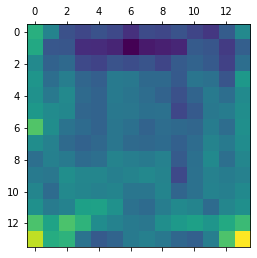

In [110]:
##Ploting the same neuron from different layers to see object detection and how the CNNs work
activations = activation_model.predict(testImage) 
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[5]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[10]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[15]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[20]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[25]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[30]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[35]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[40]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[45]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[50]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[55]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[60]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[65]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[70]
plt.matshow(first_layer_activation[0,:, :, 1], cmap='viridis')

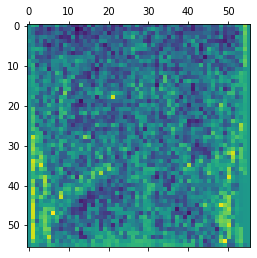

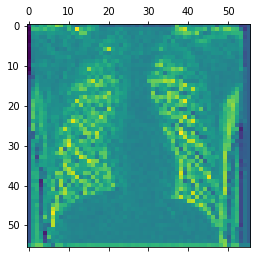

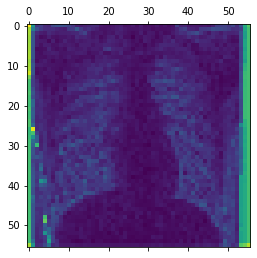

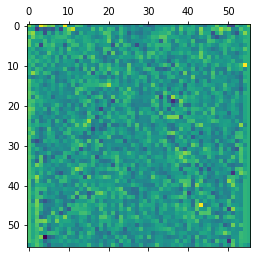

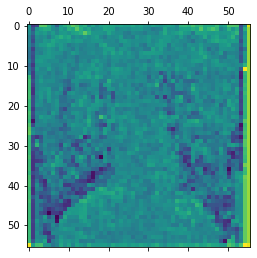

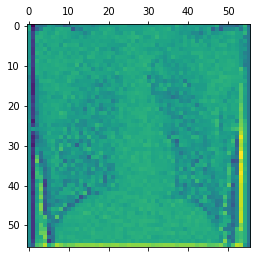

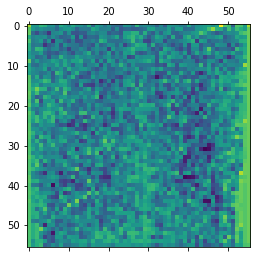

In [112]:
##Ploting sample neurons from the same layer to see object detection and how the CNNs work
activations = activation_model.predict(testImage) 
first_layer_activation = activations[15]
plt.matshow(first_layer_activation[0,:, :, 0], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[15]
plt.matshow(first_layer_activation[0,:, :, 20], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[15]
plt.matshow(first_layer_activation[0,:, :, 40], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[15]
plt.matshow(first_layer_activation[0,:, :, 60], cmap='viridis')


activations = activation_model.predict(testImage) 
first_layer_activation = activations[15]
plt.matshow(first_layer_activation[0,:, :, 80], cmap='viridis')

activations = activation_model.predict(testImage) 
first_layer_activation = activations[15]
plt.matshow(first_layer_activation[0,:, :, 100], cmap='viridis')


activations = activation_model.predict(testImage) 
first_layer_activation = activations[15]
plt.matshow(first_layer_activation[0,:, :, 120], cmap='viridis')